<a href="https://colab.research.google.com/github/eteh1/Climate-Change-Impact-Analysis/blob/main/CO2%20AND%20Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   Year  CO2_Emissions  Avg_Temperature
0  2000           24.5             14.5
1  2001           25.1             14.6
2  2002           25.8             14.7
3  2003           26.5             14.7
4  2004           27.3             14.8

Statistical Summary:
             Year  CO2_Emissions  Avg_Temperature
count    23.00000      23.000000        23.000000
mean   2011.00000      36.100000        15.630435
std       6.78233       8.654531         0.810407
min    2000.00000      24.500000        14.500000
25%    2005.50000      28.650000        14.950000
50%    2011.00000      34.900000        15.500000
75%    2016.50000      42.800000        16.250000
max    2022.00000      52.000000        17.100000


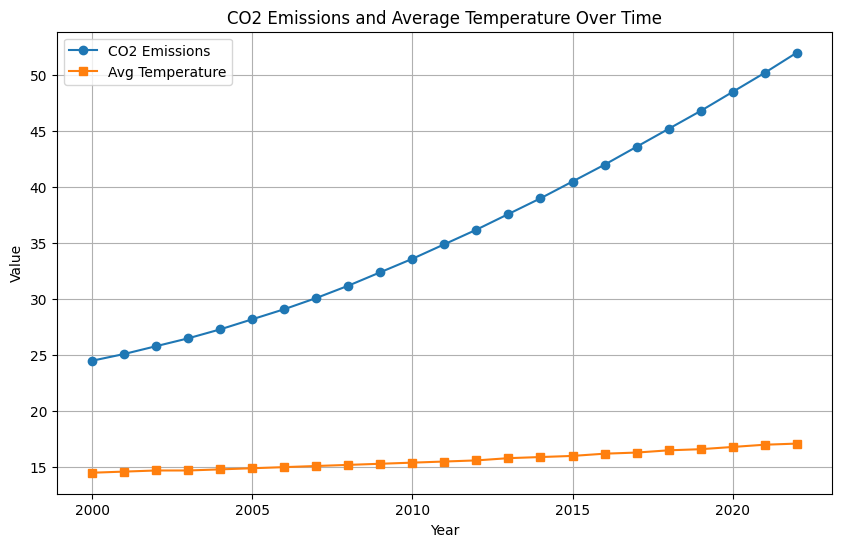

Root Mean Squared Error (RMSE): 0.04


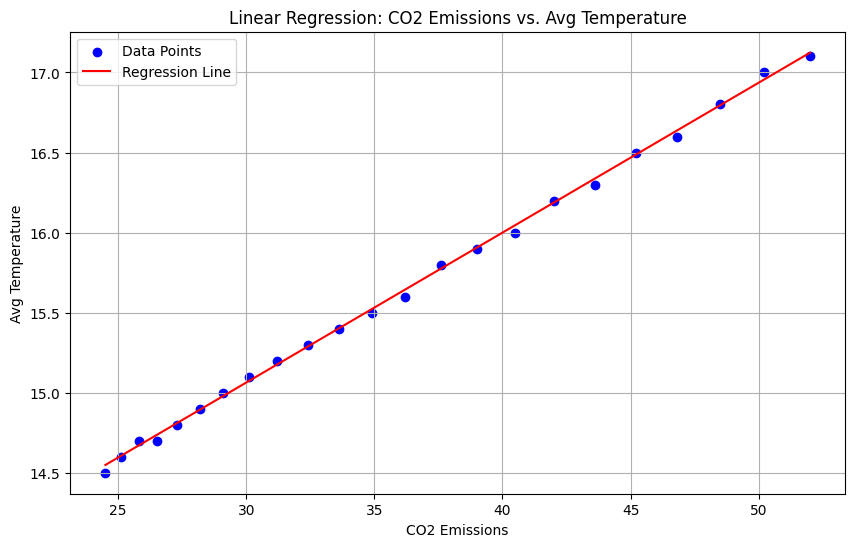

Predicted Avg Temperature for CO2 Emissions of 55 Gt: 17.40 °C
Predicted Avg Temperature for CO2 Emissions of 60 Gt: 17.87 °C
Predicted Avg Temperature for CO2 Emissions of 65 Gt: 18.34 °C

This analysis demonstrates how CO2 emissions correlate with average temperature changes and predicts potential future impacts. Replace the dataset with real data for practical insights.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Load the Dataset
# Example: Simulated dataset with CO2 emissions and average temperature
# Replace this with actual data for real-world applications
data = {
    "Year": np.arange(2000, 2023),
    "CO2_Emissions": [24.5, 25.1, 25.8, 26.5, 27.3, 28.2, 29.1, 30.1, 31.2, 32.4, 33.6, 34.9, 36.2, 37.6, 39.0, 40.5, 42.0, 43.6, 45.2, 46.8, 48.5, 50.2, 52.0],
    "Avg_Temperature": [14.5, 14.6, 14.7, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.8, 15.9, 16.0, 16.2, 16.3, 16.5, 16.6, 16.8, 17.0, 17.1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Data Exploration
print("Dataset Preview:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())

# Step 3: Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['CO2_Emissions'], label="CO2 Emissions", marker='o')
plt.plot(df['Year'], df['Avg_Temperature'], label="Avg Temperature", marker='s')
plt.title("CO2 Emissions and Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Prepare Data for Regression Analysis
X = df['CO2_Emissions'].values.reshape(-1, 1)  # CO2 Emissions as predictor
y = df['Avg_Temperature'].values  # Avg Temperature as target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Step 7: Plot Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(df['CO2_Emissions'], df['Avg_Temperature'], color='blue', label="Data Points")
plt.plot(df['CO2_Emissions'], model.predict(X), color='red', label="Regression Line")
plt.title("Linear Regression: CO2 Emissions vs. Avg Temperature")
plt.xlabel("CO2 Emissions")
plt.ylabel("Avg Temperature")
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Prediction Example
future_emissions = np.array([55, 60, 65]).reshape(-1, 1)  # Hypothetical future CO2 emissions
future_temperatures = model.predict(future_emissions)
for co2, temp in zip(future_emissions.flatten(), future_temperatures):
    print(f"Predicted Avg Temperature for CO2 Emissions of {co2} Gt: {temp:.2f} °C")

# Conclusion
print("\nThis analysis demonstrates how CO2 emissions correlate with average temperature changes and predicts potential future impacts. Replace the dataset with real data for practical insights.")
